# Protein differential expression figure reproduction
Here we'll explore some visualizations of the proteomic differential expression data we exported from Scaffold Q+, and reproduce the figures from the manuscript draft.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import sys
sys.path.append('../utils/')
import uniprot2araport as u2a

## Read in the data
The formatting of the spreadsheets is very Excel-y, so we need to do some massaging to get the right headers. We are just going to ignore the first few rows, because the information we need is all in row 5.

In [2]:
two_vs_21 = pd.read_csv('../data/proteomics/2_vs_21_CORRECT_ORDER_de_results_median_permutation_test.csv', header=4)
two_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00297),Log? Fold Change by Category (Set 2 / Set 21),...,21D,Std Dev Log? Fold Change(21D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.22,0.02,...,-0.0568,0.243706,0.0446,0.254799,-0.0373,0.273446,0.0432,0.257441,-0.0526,0.239898
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.46,-0.06,...,0.0599,0.275499,0.1184,0.238075,0.0576,0.295961,0.0024,0.241662,0.0181,0.257044
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.84,0.01,...,-0.0304,0.261425,0.0287,0.237563,-0.1041,0.262003,0.0041,0.257266,-0.0169,0.225745
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.71,0.06,...,0.0221,0.240187,0.0414,0.254064,-0.1304,0.254778,-0.1248,0.241371,-0.0471,0.240903
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.091,-0.01,...,0.053,0.259930,0.1089,0.269922,0.0149,0.251194,-0.0097,0.246817,0.0022,0.233749


In [3]:
forty_vs_21 = pd.read_csv('../data/proteomics/40_vs_21_CORRECT_ORDER_de_results_median_permutation_test.csv', header=4)
forty_vs_21.head()

,#,Visible?,Starred?,Identified Proteins (5249),Accession Number,Alternate ID,Molecular Weight,Protein Grouping Ambiguity,Permutation Test (p-value) Benjamini-Hochberg (p < 0.00553),Log? Fold Change by Category (Set 40 / Set 21),...,21D,Std Dev Log? Fold Change(21D),40A,Std Dev Log? Fold Change(40A),40B,Std Dev Log? Fold Change(40B),40C,Std Dev Log? Fold Change(40C),40D,Std Dev Log? Fold Change(40D)
0,1,True,Empty,Cluster of Ribulose bisphosphate carboxylase l...,O03042 [2],rbcL,53 kDa,True,0.9,0.01,...,-0.0568,0.243706,0.0446,0.254799,-0.0373,0.273446,0.0432,0.257441,-0.0526,0.239898
1,2,True,Empty,Cluster of Ribulose bisphosphate carboxylase s...,B3H5S2 [2],RBCS3B,21 kDa,True,0.46,-0.06,...,0.0599,0.275499,0.1184,0.238075,0.0576,0.295961,0.0024,0.241662,0.0181,0.257044
2,3,True,Empty,"ATP synthase subunit beta, chloroplastic OS=Ar...",P19366,atpB,54 kDa,True,0.002,-0.04,...,-0.0304,0.261425,0.0287,0.237563,-0.1041,0.262003,0.0041,0.257266,-0.0169,0.225745
3,4,True,Empty,Cluster of Oxygen-evolving enhancer protein 1-...,P23321 [2],PSBO1,35 kDa,True,0.47,-0.04,...,0.0221,0.240187,0.0414,0.254064,-0.1304,0.254778,-0.1248,0.241371,-0.0471,0.240903
4,5,True,Empty,Ribulose bisphosphate carboxylase/oxygenase ac...,P10896,RCA,52 kDa,NaN,0.005,-0.04,...,0.053,0.259930,0.1089,0.269922,0.0149,0.251194,-0.0097,0.246817,0.0022,0.233749


The p-value cutoff in the column headers always changes, so let's define a variable for that particular column name so in case we have to change the dataframe again, we don't have to worry about manually replacing it:

In [4]:
two_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00297)"
forty_pval_col_name = "Permutation Test (p-value) Benjamini-Hochberg (p < 0.00553)"
two_pval_cutoff = 0.00297
forty_pval_cutoff = 0.00553

## Exploratory data anlysis
Let's just get an idea for what's going on with some basic plots.

Something I'm curious about is how some of the proteins test significant but seem to have very little fold change, so let's look at the correlation between p-value and logFC.

When the p-value is very small, Scaffold just reports it as the string `< 0.0001`, so we need to change those all to some number in order to be able to plot them; I'm just going to change them all to `0.00009`. There are also some null p-values represetned by `--`, I am going to replace these with `np.nan`

In [5]:
two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('< 0.0001', '0.00009')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('< 0.0001', '0.00009')

two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].replace('--', np.nan)
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].replace('--', np.nan)

In [6]:
two_vs_21[two_pval_col_name] = two_vs_21[two_pval_col_name].astype('float64')
forty_vs_21[forty_pval_col_name] = forty_vs_21[forty_pval_col_name].astype('float64')

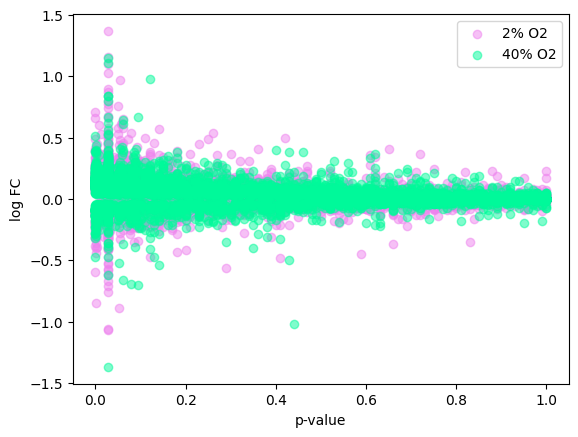

In [7]:
plt.scatter(two_vs_21[two_pval_col_name], two_vs_21["Log? Fold Change by Category (Set 2 / Set 21)"], color='violet', label='2% O2', alpha=0.5)
plt.scatter(forty_vs_21[forty_pval_col_name], forty_vs_21["Log? Fold Change by Category (Set 40 / Set 21)"], color='mediumspringgreen', label='40% O2', alpha=0.5)
plt.ylabel('log FC')
plt.xlabel('p-value')
plt.legend()

That actually looks pretty good! The proteins that are more highly up or down regulated are located near a p-value of 0.

I am also interested in the distribution of log FC across the two conditions:

Text(0.5, 0, 'log FC')

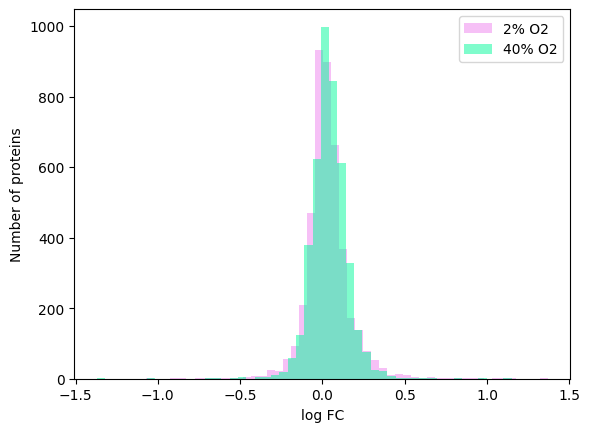

In [8]:
plt.hist(two_vs_21["Log? Fold Change by Category (Set 2 / Set 21)"], color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_vs_21["Log? Fold Change by Category (Set 40 / Set 21)"], color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

Next let's look at the distribution of log FC for the significant ones only:

Text(0.5, 0, 'log FC')

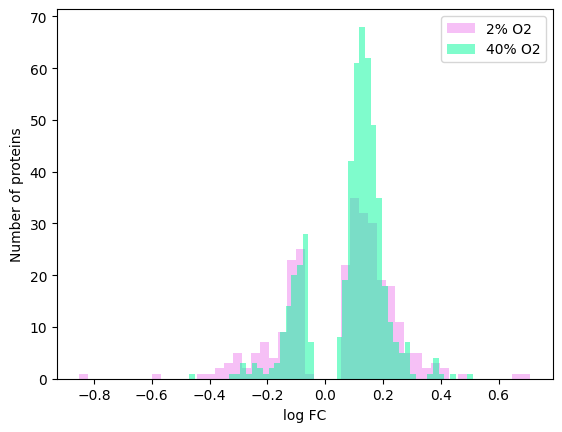

In [9]:
two_signif = two_vs_21["Log? Fold Change by Category (Set 2 / Set 21)"][two_vs_21[two_pval_col_name] < two_pval_cutoff]
forty_signif = forty_vs_21["Log? Fold Change by Category (Set 40 / Set 21)"][forty_vs_21[forty_pval_col_name] < forty_pval_cutoff]
plt.hist(two_signif, color='violet', label='2% O2', alpha=0.5, bins=50)
plt.hist(forty_signif, color='mediumspringgreen', label='40% O2', alpha=0.5, bins=50)
plt.legend()
plt.ylabel('Number of proteins')
plt.xlabel('log FC')

How many of the total proteins are significantly up or downregulated in each condition?

In [10]:
print(f'{len(two_signif)} of {len(two_vs_21)} total proteins are significantly differentially expressed at 2% O2')
print(f'{len(forty_signif)} of {len(forty_vs_21)} total proteins are significantly differentially expressed at 40% O2')

277 of 4307 total proteins are significantly differentially expressed at 2% O2
519 of 4307 total proteins are significantly differentially expressed at 40% O2


I'm also interested in the identity of the proteins that are identified in each of the conditions. That is, are the most highly up and downregulated proteins the same or different across the two samples? Let's check the set intersections:

In [11]:
two_top_ten_up = two_vs_21[two_vs_21[two_pval_col_name] < two_pval_cutoff].sort_values("Log? Fold Change by Category (Set 2 / Set 21)", ascending=False).head(10)["Identified Proteins (5249)"]
two_top_ten_down = two_vs_21[two_vs_21[two_pval_col_name] < two_pval_cutoff].sort_values("Log? Fold Change by Category (Set 2 / Set 21)", ascending=True).head(10)["Identified Proteins (5249)"]
forty_top_ten_up = forty_vs_21[forty_vs_21[forty_pval_col_name] < forty_pval_cutoff].sort_values("Log? Fold Change by Category (Set 40 / Set 21)", ascending=False).head(10)["Identified Proteins (5249)"]
forty_top_ten_down = forty_vs_21[forty_vs_21[forty_pval_col_name] < forty_pval_cutoff].sort_values("Log? Fold Change by Category (Set 40 / Set 21)", ascending=True).head(10)["Identified Proteins (5249)"]

In [12]:
print(f'There are {len(set(two_top_ten_up).intersection(forty_top_ten_up))} upregulated proteins in common between 2% and 40% O2.')

print(f'There are {len(set(two_top_ten_down).intersection(forty_top_ten_down))} downregulated proteins in common between 2% and 40% O2')

print(f'There are {len(set(two_top_ten_down + two_top_ten_up).intersection(forty_top_ten_down + forty_top_ten_up))} differentially expressed proteins in common between 2% and 40% O2')

There are 0 upregulated proteins in common between 2% and 40% O2.
There are 1 downregulated proteins in common between 2% and 40% O2
There are 1 differentially expressed proteins in common between 2% and 40% O2


Certainly in terms of string similarity we aren't seeing anything, but the protein groupings in this dataset are almost all marked as low confidence, and it's very possible that different names are similar proteins, so we'll have to investigate further here.

## PCA
As a quality control evaluation, we want to plot a PCA. Specifically, we're looking to reproduce this plot:

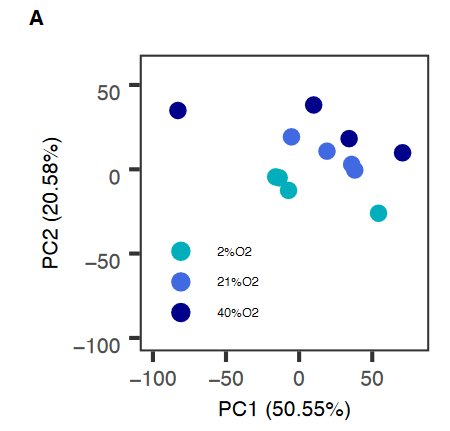

We need the raw samples report in order to build the PCA:

In [2]:
raw_data = pd.read_csv('../data/proteomics/raw_data_report_14Feb2025.csv', header=60)
raw_data.head()

,Bio Sample,MS Sample,Protein Name,Accession Numbers,Alternate IDs,Peptide Sequence,Spectrum Name,Charge,Acquired Plus One Mass,Maximum MS/MS Intensity,...,Normalized TMT-129C,Normalized TMT-130N,Normalized TMT-130C,Normalized TMT-131N,Normalized TMT-131C,Normalized TMT-132N,Normalized TMT-132C,Normalized TMT-133N,Normalized TMT-133C,Normalized TMT-134N
0,Walker Data,Data: hf2023072701 and 11 more,Ribulose bisphosphate carboxylase large chain ...,[O03042],rbcL,ALAALRLEDLR,"hf2023072714,scan_23907,type_MULTI-MSMS",3,1544.944341,69732176.0,...,21.159204,20.948940,20.492384,20.403646,20.971450,20.916940,21.442768,20.620987,21.440460,20.828632
1,Walker Data,Data: hf2023072701 and 11 more,Ribulose bisphosphate carboxylase large chain ...,[O03042],rbcL,ALAALRLEDLR,"hf2023072714,scan_23915,type_MULTI-MSMS",2,1544.944357,17495626.0,...,21.078760,21.034252,20.758627,20.923340,20.990225,20.939346,21.138992,20.858095,21.271112,20.912390
2,Walker Data,Data: hf2023072701 and 11 more,Ribulose bisphosphate carboxylase large chain ...,[O03042],rbcL,AMHAVIDR,"hf2023072701,scan_4650,type_MULTI-MSMS",2,1232.674057,14198493.0,...,21.457190,20.795515,20.498590,20.415865,21.322935,21.317970,21.052776,20.777803,20.777443,20.997303
3,Walker Data,Data: hf2023072701 and 11 more,Ribulose bisphosphate carboxylase large chain ...,[O03042],rbcL,AMHAVIDR,"hf2023072701,scan_5001,type_MULTI-MSMS",2,1232.674057,4560218.0,...,21.524054,20.597170,20.421091,20.489347,21.306826,21.162632,21.070501,20.819460,20.814243,21.018290
4,Walker Data,Data: hf2023072701 and 11 more,Ribulose bisphosphate carboxylase large chain ...,[O03042],rbcL,AMHAVIDR,"hf2023072701,scan_4651,type_MULTI-MSMS",3,1232.674071,9958673.0,...,21.509058,20.798115,20.767956,20.590425,21.490253,21.269455,21.014713,20.869970,20.766014,20.992716


The raw samples report from Scaffold doesn't have the semantic sample names; we'll use the information provided in the file list sheet from the proteomics core (pasted here) to update the column names:

In [3]:
samp2tmt = {
    'preA':	'126',
    'preB': '127N',
    'preC':	'127C',
    'preD':	'128N',
    '2A':	'130C',
    '2B':	'131N',
    '2C':	'131C',
    '2D':	'132N',
    '21A':	'128C',
    '21B':	'129N',
    '21C':	'129C',
    '21D':	'130N',
    '40A':	'132C',
    '40B':	'133N',
    '40C':	'133C',
    '40D':	'134N'
}
tmt2samp = {f'TMT-{v}': k for k, v in samp2tmt.items()}

In [4]:
raw_data = raw_data.rename(columns=tmt2samp)

Next we need to combine the rows corresponding to the same accession numbers, we do this by summing the values in the columns:

In [5]:
summed_data = raw_data.groupby(by='Accession Numbers').sum().drop(columns=['Bio Sample', 'MS Sample', 'Protein Name', 'Alternate IDs', 'Peptide Sequence', 'Spectrum Name', 'Charge', 'Acquired Plus One Mass', 'Maximum MS/MS Intensity'])
summed_data.head()

,preA,preB,preC,preD,21A,21B,21C,21D,2A,2B,...,Normalized TMT-129C,Normalized TMT-130N,Normalized TMT-130C,Normalized TMT-131N,Normalized TMT-131C,Normalized TMT-132N,Normalized TMT-132C,Normalized TMT-133N,Normalized TMT-133C,Normalized TMT-134N
Accession Numbers,,,,,,,,,,,,,,,,,,,,,
"[A0A178UWU9,A2RVS4]",1245142.900,1083136.60,1734423.900,1532185.400,1632495.900,1406436.00,1496308.600,1424955.900,1424763.400,1538050.100,...,20.522470,20.465673,20.380829,20.487766,20.379602,20.697441,20.456030,20.341528,20.420158,20.465937
[A0A178V1V2],1509896.605,1503591.15,2084718.198,1885502.982,1561182.823,1479944.28,1600039.383,1620736.310,1712971.695,1657473.455,...,36.290300,36.506596,36.195252,36.044407,36.012037,35.959052,36.503718,36.766414,35.957621,36.226388
"[A0A178VPC5,Q6ID77]",125220.375,93380.95,140506.170,102228.586,80719.400,94736.13,105878.690,80670.805,125547.020,114622.040,...,16.722986,16.285725,16.901577,16.773748,16.675623,16.489536,16.587670,16.926025,16.250000,16.835110
"[A0A1I9LLC0,Q94AM9]",2755605.700,2352397.13,2980076.020,2511688.100,2452688.010,2032897.93,2559395.300,2385376.420,2989292.780,2854477.500,...,56.578785,56.486375,57.154615,56.940426,56.370820,57.344683,56.349695,56.464215,56.341516,56.043792
"[A0A1I9LMD5,F4J703,A0A1I9LMD9,A0A1I9LMD6]",1613781.520,1503357.92,1748319.940,1773054.060,1566923.040,1418155.35,1707240.350,1546742.520,1854408.800,1741123.960,...,38.128708,37.870239,38.234417,38.084519,37.591077,37.642543,37.995949,37.784922,37.743675,37.788814


Separate the raw data:

In [6]:
summed_raw = summed_data[samp2tmt.keys()]

We need to transpose the data and remove the labels in order to prep the data for PCA:

In [7]:
sample_names = ['2A', '2B', '2C', '2D', '21A', '21B', '21C', '21D', '40A', '40B', '40C', '40D']

In [8]:
raw_for_pca = summed_raw.T
raw_for_pca.head()

Accession Numbers,"[A0A178UWU9,A2RVS4]",[A0A178V1V2],"[A0A178VPC5,Q6ID77]","[A0A1I9LLC0,Q94AM9]","[A0A1I9LMD5,F4J703,A0A1I9LMD9,A0A1I9LMD6]","[A0A1I9LP30,Q9LJQ3]","[A0A1I9LP53,A0A1I9LP56]","[A0A1I9LPI7,A0A1I9LPI6]",[A0A1I9LPW2],[A0A1I9LPZ2],...,[Q9ZW33],[Q9ZW34],[Q9ZW35],[Q9ZW37],[Q9ZW74],[Q9ZW84],[Q9ZW85],[Q9ZWA8],[Q9ZWC4],[Q9ZWT2]
preA,1245142.9,1509896.605,125220.375,2755605.70,1613781.52,7413291.94,4888933.0,2860489.5,233644.31,104517.170,...,9916561.57,7353508.77,6561047.34,614139.60,1398709.84,4302937.6,13341391.52,10287004.2,2043578.2,25578822.0
preB,1083136.6,1503591.150,93380.950,2352397.13,1503357.92,6626221.25,4832123.5,2778097.2,215888.60,61605.906,...,8847603.34,7015626.53,5691837.82,595081.94,1258883.35,3735193.0,12000426.20,9734984.7,2077354.5,21868889.4
preC,1734423.9,2084718.198,140506.170,2980076.02,1748319.94,9599894.25,5577686.5,3237733.5,297762.62,92853.900,...,11847500.70,8641637.15,7555087.78,624323.30,1407763.94,4294475.6,16242190.48,11194648.0,3263926.8,30323092.3
preD,1532185.4,1885502.982,102228.586,2511688.10,1773054.06,8081683.38,5377792.0,3306262.6,241182.50,92608.630,...,11226598.88,8341269.44,6818475.70,639016.10,1258214.69,4360895.2,14964321.02,11156855.7,2956953.0,27609817.7
2A,1424763.4,1712971.695,125547.020,2989292.78,1854408.80,6743246.34,4955902.5,3518084.0,321881.03,85372.120,...,10153413.92,6518908.98,5980224.96,608152.30,1389396.18,4800993.4,13542988.29,10424861.5,2565396.2,24951089.9


Check for `NaN` values:

In [9]:
raw_for_pca.isnull().values.any()

np.False_

Check for columns that either sum to 0 or have the same value in all rows:

In [10]:
(raw_for_pca.sum(axis=0) == 0).any()

np.False_

In [11]:
for col in raw_for_pca.columns:
    first_value = raw_for_pca[col][0]
    if (raw_for_pca[col] == first_value).all():
        print(col)

/tmp/local/50661910/ipykernel_2315599/3549353690.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_value = raw_for_pca[col][0]


In [28]:
X = raw_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in raw_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (4.20%)')

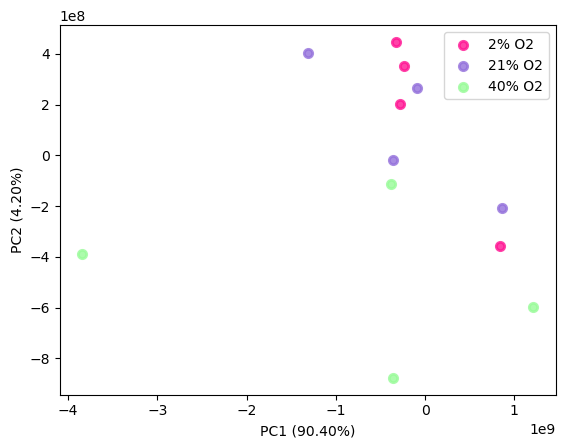

In [29]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

This is a very different PCA than the one we're trying to reproduce, so maybe the quantitative peptide information is not what I should be using the build the PCA. Let's try this using the Quantitative Spectrum Report instead:

In [25]:
quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)
quant_spec.head()

/tmp/local/50389327/ipykernel_1338898/222574151.py:1: DtypeWarning: Columns (4,5,12,17,21,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40) have mixed types. Specify dtype option on import or set low_memory=False.
  quant_spec = pd.read_csv('../data/proteomics/quant_spectrum_report.csv', header=60)


,Experiment,Protein Name,Accession Numbers,Alternate IDs,Valid,Exclusive,Sequence,Prob,Modifications,Andromeda P-score,...,Stdev,Log Intensity,Observed,Actual Mass,Charge,Delta Da,Delta PPM,Spectrum ID,Bio Sample,MS/MS Sample
0,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,99%,TMT-16plex (+304),70.332,...,0.133170,26.555466,772.975817,1543.937081,2.0,0.000124,0.080535,"hf2023072714,scan_23915,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
1,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aLAALRLEDLR,100%,TMT-16plex (+304),120.770,...,0.132281,27.089565,515.652964,1543.937065,3.0,0.000140,0.090891,"hf2023072714,scan_23907,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
2,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),89.355,...,0.140456,24.809607,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072714,scan_10177,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
3,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),106.140,...,0.132234,27.550098,608.843217,1215.671881,2.0,0.000066,0.053944,"hf2023072714,scan_10176,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more
4,Walker - Fu TMT Data 20230526,Ribulose bisphosphate carboxylase large chain ...,O03042,rbcL,True,True,aMHAVIDR,99%,TMT-16plex (+304),90.657,...,0.140456,24.745186,406.231234,1215.671875,3.0,0.000072,0.058876,"hf2023072703,scan_10173,type_MULTI-MSMS",Walker Data,Data: hf2023072701 and 11 more


In [26]:
quant_spec_for_pca = quant_spec[sample_names].iloc[:-1].T
quant_spec_for_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71300,71301,71302,71303,71304,71305,71306,71307,71308,71309
2A,-0.1736,-0.4399,-0.03464,0.1196,0.1226,-0.3159,-0.1643,-0.5112,-0.4337,0.0593,...,-0.2118,0.3169,0.01781,-0.002424,0.133,0.1211,-0.0452,0.1608,0.1631,-0.2351
2B,-0.008904,-0.5286,-0.1753,-0.09943,-0.1041,-0.7557,-0.3418,-0.4429,-0.5164,-0.3044,...,-0.125,0.7683,-0.1906,0.003126,-0.07696,-0.0488,-0.1382,0.1305,-0.05738,-0.01082
2C,0.05798,0.03921,0.7789,0.9298,0.2868,0.4738,0.558,0.3746,0.3907,1.046,...,-0.08782,0.01757,-0.09281,0.05256,-0.2313,0.3047,-0.2056,0.1703,0.2914,-0.3268
2D,0.007103,-0.0153,0.7057,0.9085,0.2176,0.2487,0.3372,0.2304,0.3857,1.056,...,-0.1277,-0.3066,-0.1265,-0.001377,-0.03672,0.3446,-0.09566,0.07305,0.08583,-0.155
21A,0.1367,0.3269,-0.2841,-0.1885,-0.1804,-0.1842,-0.1857,-0.1029,-0.06998,-0.4215,...,0.06827,0.2312,-0.03157,0.02288,-0.08372,0.1676,0.04442,0.2448,-0.2216,-0.001535


In [27]:
a = (quant_spec_for_pca.fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
row_idxs, col_idxs = np.where(pd.isnull(a))
nan_strings = [quant_spec_for_pca.iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
print(set(nan_strings))

{'Value missing (-0.17987442)', 'Value missing (-0.37354088)', 'No values (0.16019249)', 'No values (0.06798744)', 'Value missing (-0.3818531)', 'Value missing (-0.09235382)', 'Value missing (-0.22144699)', 'Value missing (-0.039333344)', 'Value missing (0.12310219)', 'Value missing (0.02983284)', 'Value missing (-0.008922577)', 'Value missing (-4.8205338)', 'Value missing (-1.3690319)', 'Reference missing (4.536378)', 'Value missing (0.04109192)', 'Value missing (-0.29732704)', 'Value missing (-0.077199936)', 'Value missing (-0.06553841)', 'Value missing (0.0066509247)', 'Value missing (-0.07111931)', 'Value missing (-7.4143715)', 'Value missing (-1.425003)', 'Reference missing (3.9401522)', 'Value missing (0.14933014)', 'Value missing (-0.1694603)', 'Value missing (-0.1963749)', 'Value missing (-0.102285385)', 'Value missing (-7.5530586)', 'Value missing (-1.6163368)', 'Value missing (-4.9158764)', 'Value missing (-0.120456696)', 'Value missing (-0.04379654)', 'Value missing (-0.0242

It's unclear to me what the values are in parentheses if those values are supposedly missing, just going to replace them all with `NaN`:

In [28]:
nan_strings = list(set([i[:i.index('(')] + '*' for i in nan_strings]))
print(nan_strings)
quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)
quant_spec_for_pca = quant_spec_for_pca.astype('float64')

['Reference missing *', 'Value missing *', 'No values *']


/tmp/local/50389327/ipykernel_1338898/987023305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  quant_spec_for_pca = quant_spec_for_pca.replace(nan_strings, 0, regex=True)


In [29]:
X = quant_spec_for_pca.to_numpy()
y = np.array([i[:-1] + '% O2' for i in quant_spec_for_pca.index.tolist()])

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

Text(0, 0.5, 'PC2 (20.21%)')

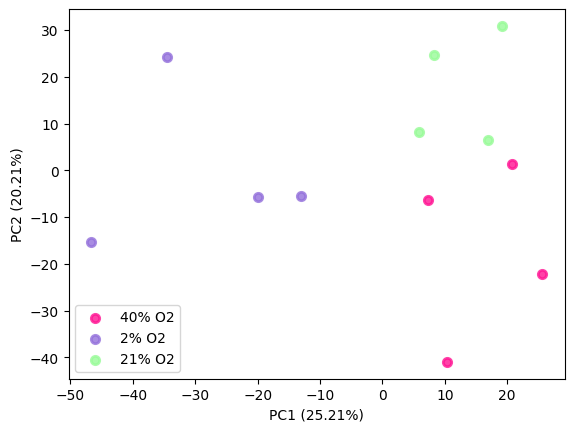

In [30]:
plt.figure()
colors = ["deeppink", "mediumpurple", "palegreen"]
sample_groups = np.array(list(set([i[:-1] + '% O2' for i in sample_names])))
pc1_ex_var, pc2_ex_var = pca.explained_variance_ratio_
lw = 2

for color, i, group in zip(colors, sample_groups, sample_groups):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=group
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.xlabel(f'PC1 ({pc1_ex_var*100:.2f}%)')
plt.ylabel(f'PC2 ({pc2_ex_var*100:.2f}%)')

Also doesn't look like Xinyu's, not totally sure what else I would use. The Google AI box says that usually peptide abundances are used, which is what I initially did; I'm not sure what Xinyu did, but I am going to leave this here for now.

## Number of DE proteins at conditions
Reproducing the following plot:

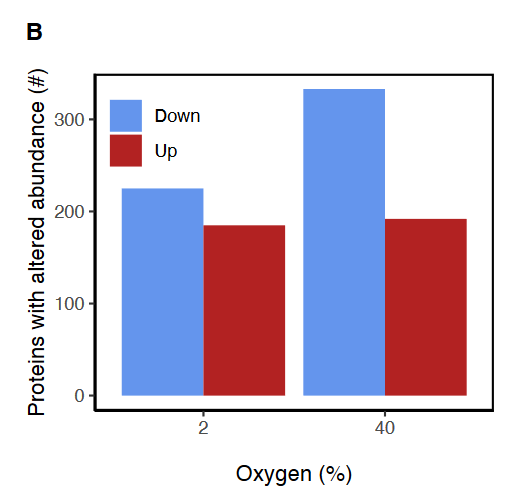


Make sure the required columns are floats, replace nonstandard missing data strings with `np.nan`:

In [31]:
def clean_columns(df, col_names):
    """
    Replaces nonstandard strings with np.nan in a subset of columns and casts columns to float.
    """
    a = (df[col_names].fillna(1).apply(lambda x: pd.to_numeric(x, errors='coerce')))
    row_idxs, col_idxs = np.where(pd.isnull(a))
    nan_strings = [df[col_names].iloc[i, j] for i, j in zip(row_idxs, col_idxs)]
    print(f'Replacing {set(nan_strings)} with np.nan')
    df = df.replace(nan_strings, np.nan, regex=True)
    df[col_names] = df[col_names].astype('float64')
    return df

In [32]:
two_vs_21 = clean_columns(two_vs_21, ['Log? Fold Change by Category (Set 2 / Set 21)', two_pval_col_name])
forty_vs_21 = clean_columns(forty_vs_21, ['Log? Fold Change by Category (Set 40 / Set 21)', forty_pval_col_name])

Replacing set() with np.nan
Replacing set() with np.nan


Subset the dataframes to get the up and downregulated proteins in each condition:

In [33]:
two_up = two_vs_21[(two_vs_21[two_pval_col_name] < two_pval_cutoff) & (two_vs_21['Log? Fold Change by Category (Set 2 / Set 21)'] > 0)]
two_down = two_vs_21[(two_vs_21[two_pval_col_name] < two_pval_cutoff) & (two_vs_21['Log? Fold Change by Category (Set 2 / Set 21)'] < 0)]
forty_up = forty_vs_21[(forty_vs_21[forty_pval_col_name] < forty_pval_cutoff) & (forty_vs_21['Log? Fold Change by Category (Set 40 / Set 21)'] > 0)]
forty_down = forty_vs_21[(forty_vs_21[forty_pval_col_name] < forty_pval_cutoff) & (forty_vs_21['Log? Fold Change by Category (Set 40 / Set 21)'] < 0)]

Save out the up and downregulated proteins as CSV files:

In [66]:
two_up.to_csv('../data/proteomics/2_vs_21_UPregulated_14Feb2025.csv', index=False)
two_down.to_csv('../data/proteomics/2_vs_21_DOWNregulated_14Feb2025.csv', index=False)
forty_up.to_csv('../data/proteomics/40_vs_21_UPregulated_14Feb2025.csv', index=False)
forty_down.to_csv('../data/proteomics/40_vs_21_DOWNregulated_14Feb2025.csv', index=False)

Now we can make the figure:

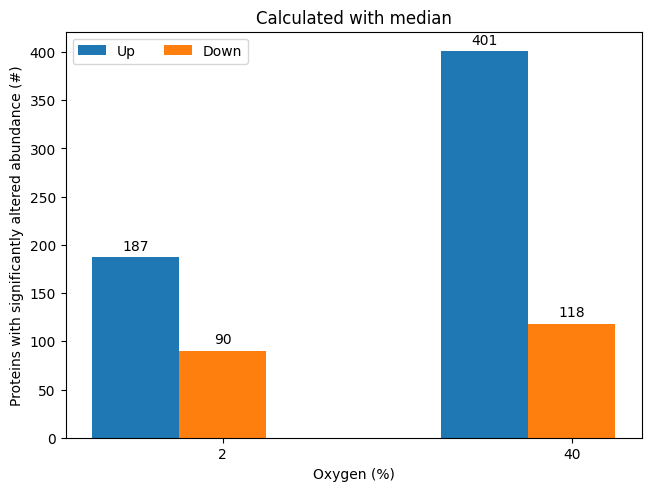

In [34]:
conditions = ('2', '40')
values = {
    'Up': (len(two_up), len(forty_up)),
    'Down': (len(two_down), len(forty_down))
}

x = np.arange(len(conditions))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('Proteins with significantly altered abundance (#)')
ax.set_xlabel('Oxygen (%)')
ax.set_xticks(x + width, conditions)
ax.set_title('Calculated with median')
ax.legend(loc='upper left', ncols=3)

This looks substantially different in terms of numbers than the original, however, the general relationship trends are the same; I assume the difference is because this was done with the median while they used the mean. However, we can check that assumption by doing the calculation with the mean and seeing what we get:

In [35]:
two_mean = pd.read_csv('../data/proteomics/2_vs_21_CORRECT_ORDER_de_results_mean_t_test.csv', header=4)
forty_mean = pd.read_csv('../data/proteomics/40_vs_21_CORRECT_ORDER_de_results_mean_t_test.csv', header=4)

In [36]:
two_mean_pval_col_name = 'T-Test (p-value) Benjamini-Hochberg (p < 0.00503)'
forty_mean_pval_col_name = 'T-Test (p-value) Benjamini-Hochberg (p < 0.00653)'
two_mean_pval_cutoff = 0.00503
forty_mean_pval_cutoff = 0.00653

In [37]:
two_mean = clean_columns(two_mean, ['Log? Fold Change by Category (Set 2 / Set 21)', two_mean_pval_col_name])
forty_mean = clean_columns(forty_mean, ['Log? Fold Change by Category (Set 40 / Set 21)', forty_mean_pval_col_name])

Replacing {'< 0.0001', '--'} with np.nan
Replacing {'< 0.0001', '--'} with np.nan


In [38]:
two_mean_up = two_mean[(two_mean[two_mean_pval_col_name] < two_mean_pval_cutoff) & (two_mean['Log? Fold Change by Category (Set 2 / Set 21)'] > 0)]
two_mean_down = two_mean[(two_mean[two_mean_pval_col_name] < two_mean_pval_cutoff) & (two_mean['Log? Fold Change by Category (Set 2 / Set 21)'] < 0)]
forty_mean_up = forty_mean[(forty_mean[forty_mean_pval_col_name] < forty_mean_pval_cutoff) & (forty_mean['Log? Fold Change by Category (Set 40 / Set 21)'] > 0)]
forty_mean_down = forty_mean[(forty_mean[forty_mean_pval_col_name] < forty_mean_pval_cutoff) & (forty_mean['Log? Fold Change by Category (Set 40 / Set 21)'] < 0)]

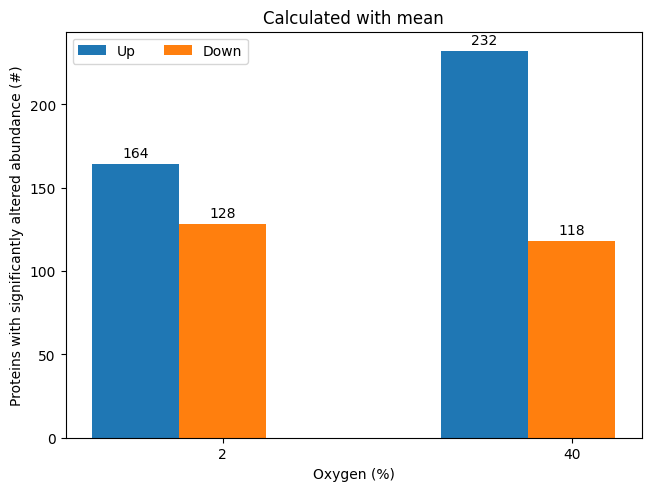

In [39]:
conditions = ('2', '40')
values = {
    'Up': (len(two_mean_up), len(forty_mean_up)),
    'Down': (len(two_mean_down), len(forty_mean_down))
}

x = np.arange(len(conditions))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1
ax.set_ylabel('Proteins with significantly altered abundance (#)')
ax.set_xlabel('Oxygen (%)')
ax.set_xticks(x + width, conditions)
ax.set_title('Calculated with mean')
ax.legend(loc='upper left', ncols=3)

This is still different from the original plot, but the general shape of it is much much more similar. However, given that I started with pre-processed data in Scaffold and selected the Student's T-test, I feel like this plot should have come out exactly the same. Where is the missing link here? UPDATE: I believe this is due to reversal of the categories.

## Photosynthetic protein abundance changes
Reproducing the following plot:

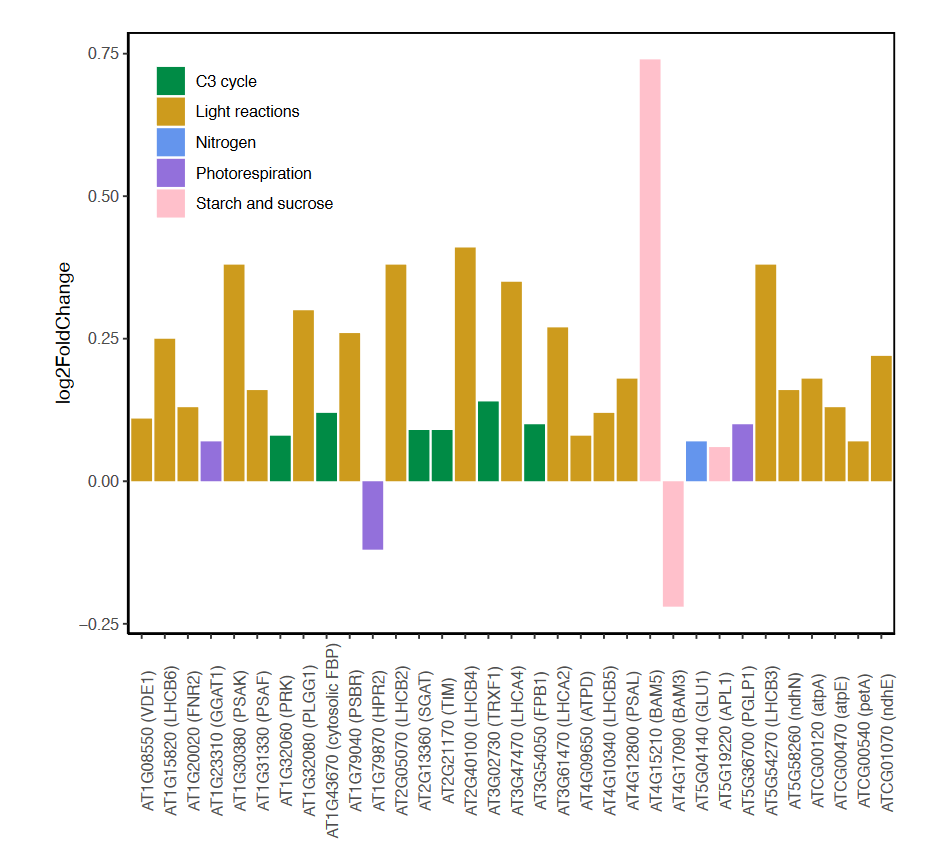

For the sake of reproduction, I am going to use the pathway groupings and exact genes provided here; I'll dive deeper into other proteins and figure out how she chose these ones and assigned functional groups later on. I'm assuming she used the mean of the log FC values across the biological replicates to generate the values plotted here.

First, we need to convert the UniProt ID's to A. thaliana gene names. Unfortunately, the commented out code for the API of the UniProt ID converted doesn't work, as for some reason the ID converter doesn't contain all the ID associations that are available in the database. For now, I am just searching the Arabidopsis ID's manually to get back to the UniProt ID that I have in my data; this is not scalable so some programmatic solution should eventually be implemented if this conversion is needed at a larger scale in the future.

In [40]:
ids_to_convert = two_vs_21["Accession Number"].dropna().str.split('[').str[0].str.strip()

In [41]:
# job_id = u2a.submit_id_mapping(
#     from_db="UniProtKB_AC-ID", to_db="Araport", ids=ids_to_convert
# )
# if u2a.check_id_mapping_results_ready(job_id):
#     link = u2a.get_id_mapping_results_link(job_id)
#     results = u2a.get_id_mapping_results_search(link)
#     # Equivalently using the stream endpoint which is more demanding
#     # on the API and so is less stable:
#     # results = get_id_mapping_results_stream(link)

In [42]:
# print(f'There were {len(results["results"])} successful ID conversions, and {len(results["failedIds"])} failed ones.')

In [43]:
# converted_ids = {res['to']: res['from'] for res in results['results']}

In [44]:
# plot_protein_ids = []
# not_converted = 0
# for plot_gene in genes_from_plot:
#     try:
#         plot_protein_ids.append(converted_ids[plot_gene])
#     except KeyError:
#         print(f'Protein ID for gene {plot_gene} was not converted.')
#         not_converted += 1
# print(f'{not_converted} of {len(genes_from_plot)} total IDs were not converted.')

In [45]:
plot_gene_mapping = {
    'AT1G08550': 'Q39249',
    'AT1G15820': 'Q9LMQ2',
    'AT1G20020': 'Q8W493',
    'AT1G23310': 'Q9LR30',
    'AT1G30380': 'Q9SUI5',
    'AT1G31330': 'Q9SHE8',
    'AT1G32060': 'P25697',
    'AT1G32080': 'Q9FVQ4',
    'AT1G43670': 'Q9MA79',
    'AT1G79040': 'P27202',
    'AT1G79870': 'Q9CA90',
    'AT2G05070': 'Q9S7J7',
    'AT2G13360': 'Q56YA5',
    'AT2G21170': 'Q9SKP6',
    'AT2G40100': 'Q9S7W1',
    'AT3G02730': 'Q9XFH8',
    'AT3G47470': 'P27521',
    'AT3G54050': 'P25851',
    'AT3G61470': 'Q9SYW8',
    'AT4G09650': 'Q9SSS9',
    'AT4G10340': 'Q9XF89',
    'AT4G12800': 'Q9SUI4',
    'AT4G15210': 'P25853',
    'AT4G17090': 'O23553',
    'AT5G04140': 'Q9ZNZ7',
    'AT5G19220': 'P55229',
    'AT5G36700': 'P0DKC3',
    'AT5G54270': 'Q9S7M0',
    'AT5G58260': 'Q9LVM2',
    'ATCG00120': 'P56757',
    'ATCG00470': 'P09468',
    'ATCG00540': 'P56771',
    'ATCG01070': 'P26289'
}

Make sure that the IDs we pulled are all present in our dataset, as many of them had alternatives:

In [46]:
two_vs_21['Accession Number'] = two_vs_21["Accession Number"].dropna().str.split('[').str[0].str.strip()

In [47]:
all([True if i in two_vs_21['Accession Number'].tolist() else False for i in plot_gene_mapping.values()])

False

What ID's are missing?

In [48]:
[i for i in plot_gene_mapping.values() if i not in two_vs_21['Accession Number'].tolist()]

['Q9SUI4', 'P25853']

What are alternate IDs for these TAIR IDs?

In [49]:
# Paste alternate IDs here to check
'A0A1P8B7H0' in two_vs_21['Accession Number'].tolist()

True

I was able to find an alternate ID for only one of the two that apears in the dataset, we will leave Q9SUI4 out for the time being.

In [50]:
plot_gene_mapping['AT4G15210'] = 'A0A1P8B7H0'

In [51]:
plot_gene_mapping = {k: v for k, v in plot_gene_mapping.items() if v != 'Q9SUI4'}

In [52]:
two_photosynth = two_vs_21[two_vs_21['Accession Number'].isin(plot_gene_mapping.values())]

In [53]:
data_to_plot = two_photosynth[['Accession Number', 'Log? Fold Change by Category (Set 2 / Set 21)']].set_index('Accession Number').to_dict()['Log? Fold Change by Category (Set 2 / Set 21)']
data_to_plot = {k: data_to_plot[plot_gene_mapping[k]] for k in plot_gene_mapping.keys()}

Lastly, we want to color the bars by whether or not the differential expression reported was determined to be significant when using a Permutation test on the median of the sample values:

In [54]:
colors = {k: 'palegreen' if two_vs_21[two_vs_21['Accession Number'] == v][two_pval_col_name].iloc[0] < two_pval_cutoff else 'orchid' for k, v in plot_gene_mapping.items()}

/tmp/local/50389327/ipykernel_1338898/1086384423.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


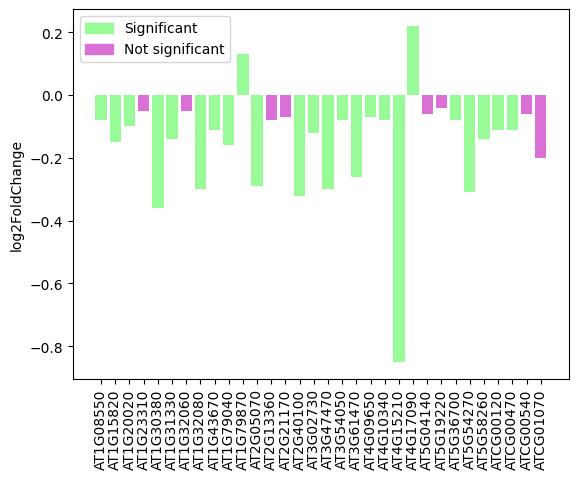

In [55]:
fig, ax = plt.subplots()
ax.bar(data_to_plot.keys(), data_to_plot.values(), color=colors.values())
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.set_ylabel('log2FoldChange')
patches = [mpatches.Patch(color='palegreen', label='Significant'), mpatches.Patch(color='orchid', label='Not significant')]
ax.legend(handles=patches)

Hooray, that looks basically right with the exception of the inversion of the signs -- however, I double checked and I did in fact use the correct reference category for 2%. The other concern I have is that the absolute values are also somewhat different; but the general trends look the same besides being inverted, so I am less worried about that.

The column header in the spreadsheet used to make the original figures indicates that the 40% comparison was inverted. The spreadhseet doesn't contain the original column header for 2%; based on the above, I believe it was also inverted; however, I am going to reproduce the following version of the plot for 40% to make sure the same trend holds:


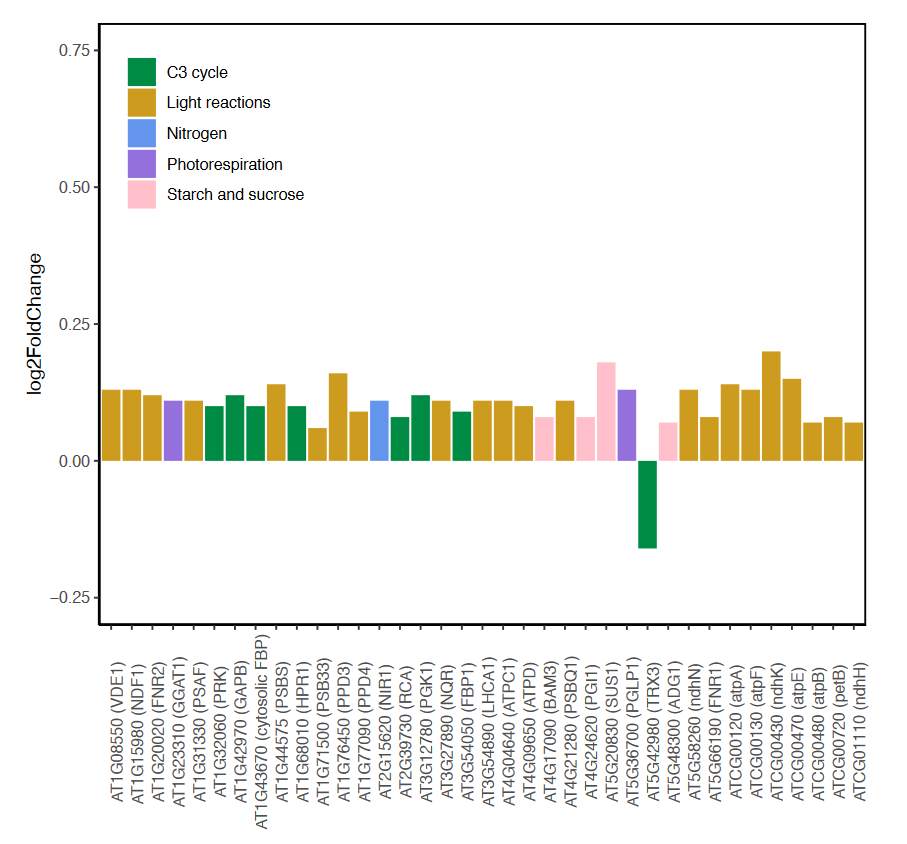

In [56]:
forty_to_plot = {
    'AT1G08550': 'Q39249',
    'AT1G15980': 'Q9S9N6',
    'AT1G20020': 'Q8W493',
    'AT1G23310': 'Q9LR30',
    'AT1G31330': 'Q9SHE8',
    'AT1G32060': 'P25697', 
    'AT1G42970': 'P25857',
    'AT1G43670': 'Q9MA79',
    'AT1G44575': 'Q9XF91',
    'AT1G68010': 'Q9C9W5',
    'AT1G71500': 'Q9C9I7',
    'AT1G76450': 'Q9S720',
    'AT1G77090': 'O49292',
    'AT2G15620': 'Q39161',
    'AT2G39730': 'P10896', 
    'AT3G12780': 'Q9LD57',
    'AT3G27890': 'Q9LK88', 
    'AT3G54050': 'P25851',
    'AT3G54890': 'Q01667',
    'AT4G04640': 'Q01908',
    'AT4G09650': 'Q9SSS9',
    'AT4G17090': 'O23553',
    'AT4G21280': 'Q9XFT3',
    'AT4G24620': 'Q8H103',
    'AT5G20830': 'P49040',
    'AT5G36700': 'P0DKC3',
    'AT5G42980': 'Q42403',
    'AT5G48300': 'P55228',
    'AT5G58260': 'Q9LVM2',
    'AT5G66190': 'Q9FKW6',
    'ATCG00120': 'P56757',
    'ATCG00130': 'P56759',
    'ATCG00430': 'P56756',
    'ATCG00470': 'P09468',
    'ATCG00480': 'P19366',
    'ATCG00720': 'P56773',
    'ATCG01110': 'P56753'
}

In [57]:
forty_vs_21['Accession Number'] = forty_vs_21["Accession Number"].dropna().str.split('[').str[0].str.strip()

In [58]:
all([True if i in forty_vs_21['Accession Number'].tolist() else False for i in forty_to_plot.values()])

False

In [59]:
[i for i in forty_to_plot.values() if i not in forty_vs_21['Accession Number'].tolist()]

['Q01667']

In [60]:
# Paste alternate IDs here to check
'A8MS75' in two_vs_21['Accession Number'].tolist()

True

None of the options that appear for this Araport ID test True here, so we'll move on without it.

In [61]:
forty_to_plot = {k: v for k, v in forty_to_plot.items() if v != 'Q01667'}

In [62]:
forty_photosynth = forty_vs_21[forty_vs_21['Accession Number'].isin(forty_to_plot.values())]

In [63]:
data_to_plot_forty = forty_photosynth[['Accession Number', 'Log? Fold Change by Category (Set 40 / Set 21)']].set_index('Accession Number').to_dict()['Log? Fold Change by Category (Set 40 / Set 21)']
data_to_plot_forty = {k: data_to_plot_forty[forty_to_plot[k]] for k in forty_to_plot.keys()}

In [64]:
colors_forty = {k: 'palegreen' if forty_vs_21[forty_vs_21['Accession Number'] == v][forty_pval_col_name].iloc[0] < forty_pval_cutoff else 'orchid' for k, v in forty_to_plot.items()}

/tmp/local/50389327/ipykernel_1338898/2621109870.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)


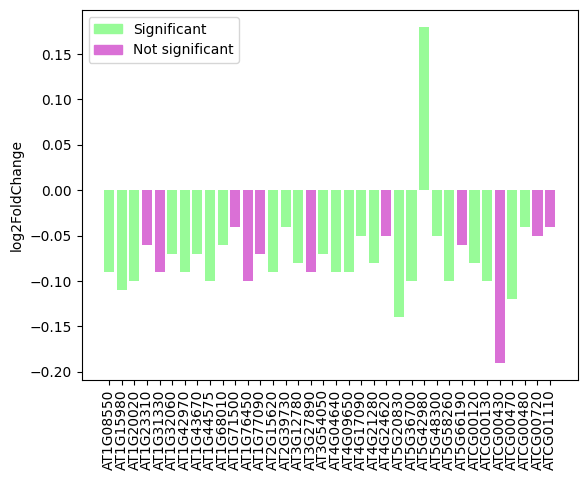

In [65]:
fig, ax = plt.subplots()
ax.bar(data_to_plot_forty.keys(), data_to_plot_forty.values(), color=colors_forty.values())
_ = ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=90)
ax.set_ylabel('log2FoldChange')
patches = [mpatches.Patch(color='palegreen', label='Significant'), mpatches.Patch(color='orchid', label='Not significant')]
ax.legend(handles=patches)